In [106]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import OrderedDict
import seaborn as sns
import matplotlib as mt

In [107]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated.csv', encoding="utf-8")

In [108]:
data.head()

,Unnamed: 0,Num,date,pattern,pattern_name,msecurity,colon_count,end_count,end,start,low_x,low_y,upper_x,upper_y,vertical_x,vertical_y
0,0,0,17-03-2019,"[{'end': 1499644800000, 'lower_line': [[149238...",descending_triangle,466,5,1,1499644800000,1492387200000,"1492387200000, 1495065600000, 1499644800000","33.788889206313414, 33.92502770445454, 34.1321...","1492387200000, 1493251200000, 1496793600000, ...","35.83744663848295, 35.60223951375904, 34.77901...","1492387200000, 1492387200000","33.788889206313414, 35.83744663848295"
1,1,51,17-03-2019,"[{'end': 1479168000000, 'lower_line': [[146041...",descending_triangle,461,5,1,1479168000000,1460419200000,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...","1460419200000, 1465171200000, 1465430400000, ...","81.32349060028852, 76.442523042809, 76.0571834...","1460419200000, 1460419200000","61.49000200000002, 81.32349060028852"
2,2,55,11-04-2019,"[{'end': 1539561600000, 'lower_line': [[153005...",descending_triangle,20,5,1,1539561600000,1530057600000,"1530057600000, 1534291200000, 1539561600000","169.1104342374519, 169.10051148971863, 169.088...","1530057600000, 1532563200000, 1537142400000, ...","192.57368580618618, 186.3933090092458, 175.268...","1530057600000, 1530057600000","169.1104342374519, 192.57368580618618"
3,3,61,17-03-2019,"[{'end': 1525824000000, 'lower_line': [[152176...",descending_triangle,72,5,1,1525824000000,1521763200000,"1521763200000, 1523577600000, 1525824000000","32.98276910628695, 32.895437060041345, 32.7831...","1521763200000, 1522886400000, 1524614400000, ...","34.71613886501409, 34.232892398906245, 33.3872...","1521763200000, 1521763200000","32.98276910628695, 34.71613886501409"
4,4,94,11-04-2019,"[{'end': 1484179200000, 'lower_line': [[148124...",descending_triangle,424,10,2,1484179200000,1481241600000,"1481241600000, 1483401600000, 1484179200000","42.87071025387183, 42.97687116997069, 43.02641...","1481241600000, 1481673600000, 1482105600000, ...","43.99716682587515, 43.86479129473083, 43.73241...","1481241600000, 1481241600000","42.87071025387183, 43.99716682587515}, {'end':..."


In [109]:
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [110]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][0]
data2["first_y"] = data2["y"][0]
data2["first_x"][1:5] = ""
data2["first_y"][1:5] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
data3

,first_x,first_y
0,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321..."
1,,
2,,
3,,
4,,


In [111]:
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [112]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
#data3["x_9"] = newx[9]
#data3["xx_1"] = newx[10]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
#data3["y_9"] = newy[9]
#data3["yy_1"] = newy[10]
data3

,first_x,first_y,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8
0,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",1492387200000,1495065600000,1499644800000,1492387200000,1493251200000,1496793600000,1499644800000,1492387200000,1492387200000,33.788889206313414,33.92502770445454,34.13219498423452,35.83744663848295,35.60223951375904,34.779014577225325,34.132194984234545,33.788889206313414,35.83744663848295
1,,,,None,None,None,None,None,None,None,None,,None,None,None,None,None,None,None,None
2,,,,None,None,None,None,None,None,None,None,,None,None,None,None,None,None,None,None
3,,,,None,None,None,None,None,None,None,None,,None,None,None,None,None,None,None,None
4,,,,None,None,None,None,None,None,None,None,,None,None,None,None,None,None,None,None


In [113]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_0,1492387200000
5,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_1,1495065600000
10,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_2,1499644800000
15,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_3,1492387200000
20,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_4,1493251200000
25,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_5,1496793600000
30,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_6,1499644800000
35,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_7,1492387200000
40,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",x_8,1492387200000
45,"1492387200000, 1495065600000, 1499644800000, ...","33.788889206313414, 33.92502770445454, 34.1321...",y_0,33.788889206313414


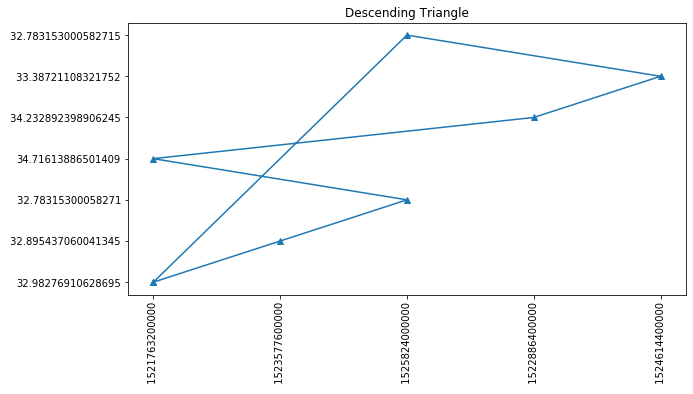

In [127]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:8].tolist()
graph_y = data3['Value'][9:17].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Descending Triangle")
plt.xticks(rotation=90)
plt.plot(graph_x,graph_y,marker='^')
plt.show()

In [115]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1.csv', encoding="utf-8")

In [116]:
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
#data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [117]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][1]
data2["first_y"] = data2["y"][1]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [118]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]

In [119]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_0,1460419200000
4,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_1,1467072000000
8,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_2,1470787200000
12,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_3,1474329600000
16,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_4,1476662400000
20,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_5,1479168000000
24,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_6,1460419200000
28,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_7,1465171200000
32,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",x_8,"1465430400000, 1468281600000, 1460419200000, ..."
36,"1460419200000, 1467072000000, 1470787200000, ...","61.49000200000002, 61.599998000000035, 61.6611...",y_0,61.49000200000002


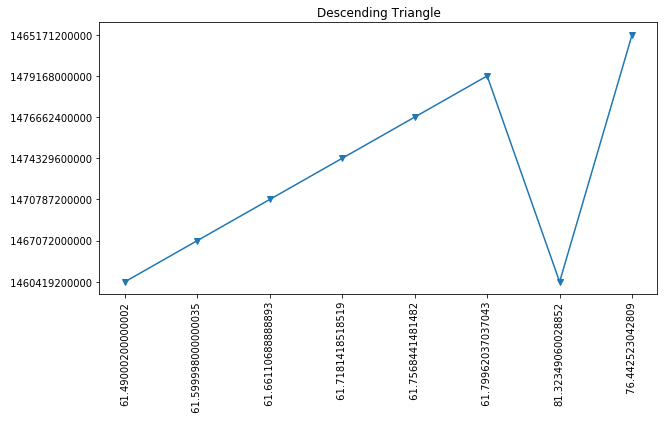

In [120]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:8].tolist()
graph_y = data3['Value'][9:17].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Descending Triangle")
plt.xticks(rotation=90)
plt.plot(graph_y,graph_x,marker='v')
plt.show()

In [121]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1.csv', encoding="utf-8")
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][2]
data2["first_y"] = data2["y"][2]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
data3['comma_count'] = data3.first_x.str.count(',')
data3['comma_count'][0]
#data3.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\test.csv')

10

In [122]:
newx = data3["first_x"].str.split(",", n =10, expand = True)
newy = data3["first_y"].str.split(",", n =10, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
data3["x_9"] = newx[9]
data3["xx_10"] = newx[10]
#data3["xx_11"] = newx[11]
#data3["xx_12"] = newx[12]
#data3["xx_13"] = newx[13]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
data3["y_9"] = newy[9]
data3["yy_10"] = newy[10]
#data3["yy_11"] = newy[11]
#data3["yy_12"] = newy[12]
#data3["yy_13"] = newy[13]
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1530057600000, 1534291200000, 1539561600000, ...","169.1104342374519, 169.10051148971863, 169.088...",comma_count,10
1,,,comma_count,0
2,,,comma_count,0
3,,,comma_count,0
4,"1530057600000, 1534291200000, 1539561600000, ...","169.1104342374519, 169.10051148971863, 169.088...",x_0,1530057600000
8,"1530057600000, 1534291200000, 1539561600000, ...","169.1104342374519, 169.10051148971863, 169.088...",x_1,1534291200000
12,"1530057600000, 1534291200000, 1539561600000, ...","169.1104342374519, 169.10051148971863, 169.088...",x_2,1539561600000
16,"1530057600000, 1534291200000, 1539561600000, ...","169.1104342374519, 169.10051148971863, 169.088...",x_3,1530057600000
20,"1530057600000, 1534291200000, 1539561600000, ...","169.1104342374519, 169.10051148971863, 169.088...",x_4,1532563200000
24,"1530057600000, 1534291200000, 1539561600000, ...","169.1104342374519, 169.10051148971863, 169.088...",x_5,1537142400000


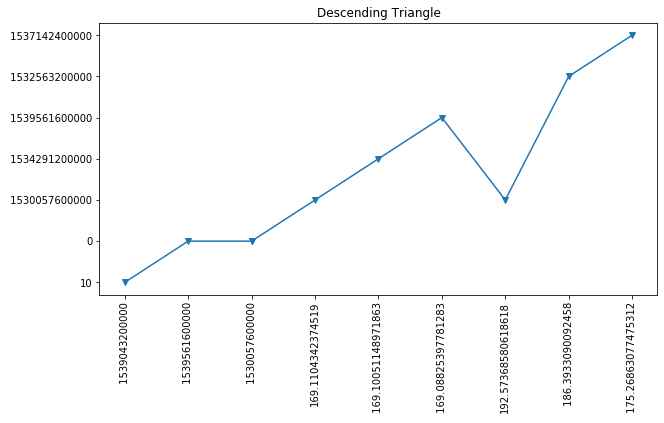

In [123]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:10].tolist()
graph_y = data3['Value'][11:21].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Descending Triangle")
plt.xticks(rotation=90)
plt.plot(graph_y,graph_x,marker='v')
plt.show()

In [124]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1.csv', encoding="utf-8")
data['x']=data['low_x']+","+data['upper_x']+","+data['vertical_x']
data['y']=data['low_y']+","+data['upper_y']+","+data['vertical_y']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Descending_Triangle\\Descending_Triangle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][3]
data2["first_y"] = data2["y"][3]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
#data3['comma_count'] = data3.first_x.str.count(',')
#data3['comma_count'][0]

In [125]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
newy = data3["first_y"].str.split(",", n =8, expand = True)
data3["x_0"] = newx[0]
data3["x_1"] = newx[1]
data3["x_2"] = newx[2]
data3["x_3"] = newx[3]
data3["x_4"] = newx[4]
data3["x_5"] = newx[5]
data3["x_6"] = newx[6]
data3["x_7"] = newx[7]
data3["x_8"] = newx[8]
#data3["x_9"] = newx[9]
#data3["xx_10"] = newx[10]
#data3["x_11"] = newx[11]
#data3["x_12"] = newx[12]
#data3["x_13"] = newx[13]
data3["y_0"] = newy[0]
data3["y_1"] = newy[1]
data3["y_2"] = newy[2]
data3["y_3"] = newy[3]
data3["y_4"] = newy[4]
data3["y_5"] = newy[5]
data3["y_6"] = newy[6]
data3["y_7"] = newy[7]
data3["y_8"] = newy[8]
#data3["y_9"] = newy[9]
#data3["yy_10"] = newy[10]
#data3["y_11"] = newy[11]
#data3["y_12"] = newy[12]
#data3["y_13"] = newy[13]
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_0,1521763200000
4,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_1,1523577600000
8,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_2,1525824000000
12,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_3,1521763200000
16,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_4,1522886400000
20,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_5,1524614400000
24,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_6,1525824000000
28,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_7,1521763200000
32,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",x_8,1521763200000
36,"1521763200000, 1523577600000, 1525824000000, ...","32.98276910628695, 32.895437060041345, 32.7831...",y_0,32.98276910628695


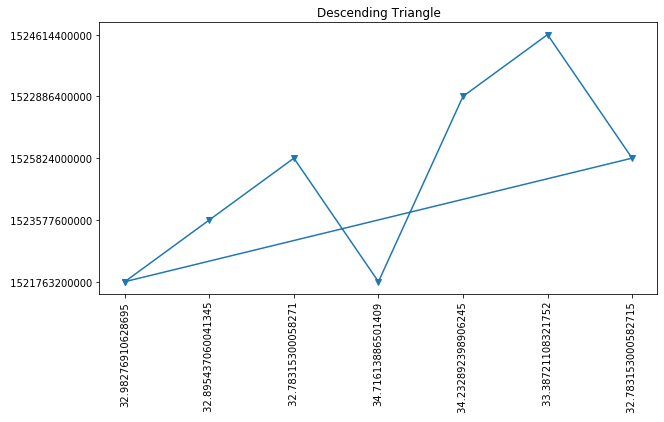

In [126]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:8].tolist()
graph_y = data3['Value'][9:17].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Descending Triangle")
plt.xticks(rotation=90)
plt.plot(graph_y,graph_x,marker='v')
plt.show()